In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import statistics

df = pd.read_excel("Coffee_sales.xlsx")
df 

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.70,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.90,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.70,Latte,Afternoon,Fri,Mar,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,10,card,ANON-0000-0000-1158,35.76,Cappuccino,Morning,Sun,Mar,7,3
3632,2025-03-23,2025-03-23 14:43:37.362,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3633,2025-03-23,2025-03-23 14:44:16.864,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3634,2025-03-23,2025-03-23 15:47:28.723,15,card,ANON-0000-0000-1316,25.96,Americano,Afternoon,Sun,Mar,7,3


In [3]:
df.rename(columns={"cash_type": "Payment_Type"}, inplace=True)
df.rename(columns={"card": "Card_number"}, inplace=True)
df.rename(columns={"money":"Amount_Paid"}, inplace=True)
df.rename(columns={"coffee_name":"Drink_Type"}, inplace=True)
df


,date,datetime,hour_of_day,Payment_Type,Card_number,Amount_Paid,Drink_Type,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.70,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.90,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.70,Latte,Afternoon,Fri,Mar,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,10,card,ANON-0000-0000-1158,35.76,Cappuccino,Morning,Sun,Mar,7,3
3632,2025-03-23,2025-03-23 14:43:37.362,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3633,2025-03-23,2025-03-23 14:44:16.864,14,card,ANON-0000-0000-1315,35.76,Cocoa,Afternoon,Sun,Mar,7,3
3634,2025-03-23,2025-03-23 15:47:28.723,15,card,ANON-0000-0000-1316,25.96,Americano,Afternoon,Sun,Mar,7,3


In [4]:
Drink_by_Amount = df[["Drink_Type", "Month_name", "Amount_Paid", "Time_of_Day"]]
Drink_by_Amount


,Drink_Type,Month_name,Amount_Paid,Time_of_Day
0,Latte,Mar,38.70,Morning
1,Hot Chocolate,Mar,38.70,Afternoon
2,Hot Chocolate,Mar,38.70,Afternoon
3,Americano,Mar,28.90,Afternoon
4,Latte,Mar,38.70,Afternoon
...,...,...,...,...
3631,Cappuccino,Mar,35.76,Morning
3632,Cocoa,Mar,35.76,Afternoon
3633,Cocoa,Mar,35.76,Afternoon
3634,Americano,Mar,25.96,Afternoon


In [ ]:
Drinks_by_Time = df[["Drink_Type","Time_of_Day"]]
time_of_day = Drinks_by_Time.groupby("Time_of_Day").count()
custom_order = ["Morning", "Afternoon", "Night"]
time_of_day_ordered = time_of_day.reindex(custom_order)
time_of_day_ordered



,Drink_Type
Time_of_Day,
Morning,1221
Afternoon,1231
Night,1184


<function matplotlib.pyplot.show(close=None, block=None)>

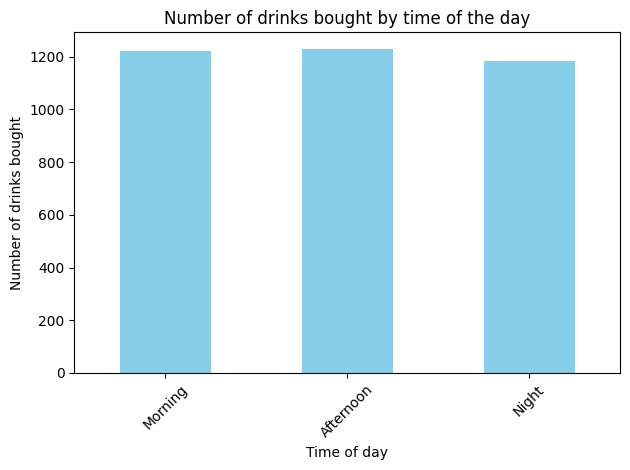

In [69]:
time_of_day_ordered.plot(kind="bar", color="skyblue", legend=False)
plt.title("Number of drinks bought by time of the day")
plt.xlabel("Time of day")
plt.ylabel("Number of drinks bought")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [64]:
Amount_Spent = df[["Month_name", "Amount_Paid"]]
Amount_by_Month = Amount_Spent.groupby("Month_name").sum()
custom_month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
Month_reordered = Amount_by_Month.reindex(custom_month_order)
Month_reordered

,Amount_Paid
Month_name,
Jan,6398.86
Feb,13215.48
Mar,17036.64
Apr,6720.56
May,9063.42
Jun,7758.76
Jul,6915.94
Aug,7613.84
Sep,9988.64


<function matplotlib.pyplot.show(close=None, block=None)>

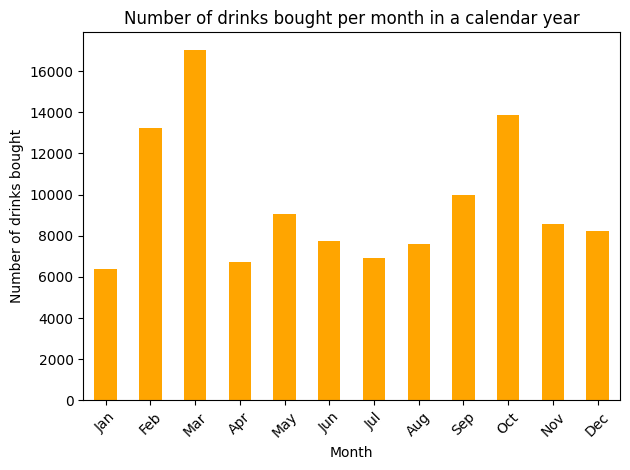

In [68]:
Month_reordered.plot(kind="bar", color="orange", legend=False)
plt.title("Number of drinks bought per month in a calendar year")
plt.xlabel("Month")
plt.ylabel("Number of drinks bought")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [36]:
Amount_by_Drink =df[["Drink_Type","Amount_Paid"]]
drink_choice = Amount_by_Drink.groupby("Drink_Type").sum()
drink_choice

,Amount_Paid
Drink_Type,
Americano,15062.26
Americano with Milk,25269.12
Cappuccino,18034.14
Cocoa,8678.16
Cortado,7534.86
Espresso,2814.28
Hot Chocolate,10172.46
Latte,27866.30


<function matplotlib.pyplot.show(close=None, block=None)>

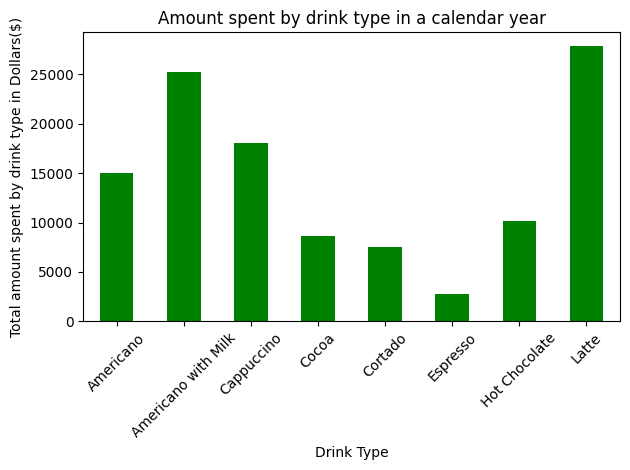

In [71]:
drink_choice.plot(kind="bar", color="green", legend=False)
plt.title("Amount spent by drink type in a calendar year")
plt.xlabel("Drink Type")
plt.ylabel("Total amount spent by drink type in Dollars($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
drink_choice = df[["Drink_Type", "Amount_Paid"]]
drinks_grouped = drink_choice.groupby("Drink_Type").count()
drinks_grouped


,Amount_Paid
Drink_Type,
Americano,578
Americano with Milk,824
Cappuccino,501
Cocoa,243
Cortado,292
Espresso,134
Hot Chocolate,282
Latte,782


<function matplotlib.pyplot.show(close=None, block=None)>

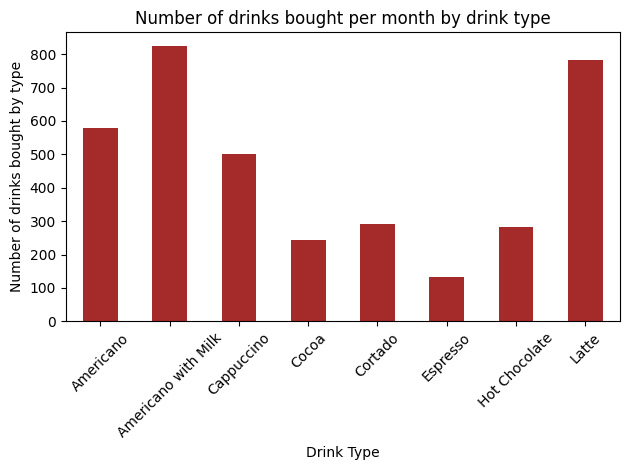

In [72]:
drinks_grouped.plot(kind="bar", color="brown", legend=False)
plt.title("Number of drinks bought per month by drink type")
plt.xlabel("Drink Type")
plt.ylabel("Number of drinks bought by type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show